/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_9402/2060545916.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_LSE, 'r', label='exponential', color='#49A007')


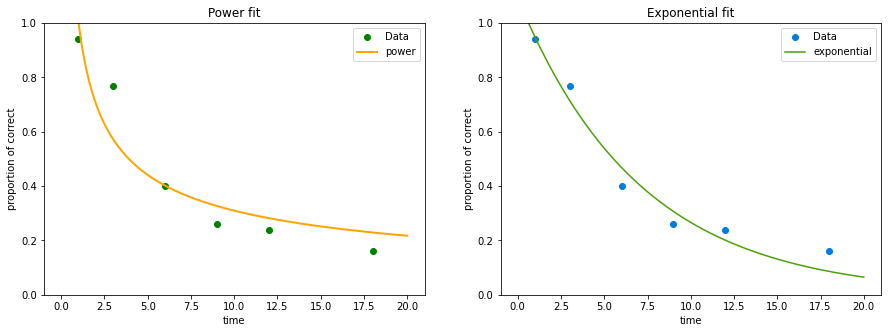

In [1]:
import numpy
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats

#### (1) DATA

n = 100 # number of trials per
t = numpy.array([1, 3, 6, 9, 12, 18]) # time points
y = numpy.array([.94, .77, .40, .26, .24, .16]) # proportion of correct
x = n*y # number of correct responses

#### (2) Define objective functions _LSE

def exp_lse(w):
  pred = w[0]*numpy.exp(-w[1]*t) # generate model prediction
  SSE = numpy.sum((y - pred)**2) # calculate SSE (sum of squared errors)
  return SSE

def pow_lse(w):
  pred = w[0]*numpy.power(t, -w[1]) # generate model prediction
  SSE = numpy.sum((y - pred)**2) # calculate SSE (sum of squared errors)
  return SSE

start_pt = numpy.random.random(2)  # two random number from 0~1
LSE_results = scipy.optimize.minimize(exp_lse, start_pt, method='nelder-mead')

start_pt = numpy.random.random(2)  # two random number from 0~1
pow_results = scipy.optimize.minimize(pow_lse, start_pt, method='nelder-mead')


model_t = numpy.arange(.01,20.01,.01)

pred_LSE = LSE_results['x'][0]*numpy.exp(-LSE_results['x'][1]*model_t)
pred_pow_LSE = pow_results['x'][0]*numpy.power(model_t, -pow_results['x'][1])

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(t, y, label='Data', color='green') ### Data
plt.plot(model_t, pred_pow_LSE, label='power', color='orange', lw=2)
plt.xlabel('time')
plt.ylabel('proportion of correct')
plt.legend()
plt.title('Power fit')
plt.ylim([0,1])

plt.subplot(1,2,2)
plt.scatter(t, y, label='Data', color='#007CDC') ### Data
plt.plot(model_t, pred_LSE, 'r', label='exponential', color='#49A007')
plt.xlabel('time')
plt.ylabel('proportion of correct')
plt.legend()
plt.title('Exponential fit')
plt.ylim([0,1])

plt.show()



In [2]:
# LOOCV (exponential function)

import copy 
import numpy
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats

n = 100 # number of trials per
t = numpy.array([1, 3, 6, 9, 12, 18]) # time points
y = numpy.array([.94, .77, .40, .26, .24, .16]) # proportion of correct
x = n*y # number of correct responses


def exp_lse_train(w):
  pred = w[0]*numpy.exp(-w[1]*t_train) # generate model prediction
  SSE = numpy.sum((y_train - pred)**2) # calculate SSE (sum of squared errors)
  return SSE

def exp_lse_test(w):
  pred = w[0]*numpy.exp(-w[1]*t_test) # generate model prediction
  SSE = numpy.sum((y_test - pred)**2) # calculate SSE (sum of squared errors)
  return SSE

test_sse = []

for i in range(len(t)):
  temp_t = copy.deepcopy(list(t))
  temp_y = copy.deepcopy(list(y))
  t_test  = numpy.array(temp_t[i])
  y_test  = numpy.array(temp_y[i])
  del temp_t[i]
  del temp_y[i]
  t_train =  numpy.array(temp_t)
  y_train =  numpy.array(temp_y)
  print(i, t_train, y_train)
   
  start_pt = numpy.abs(numpy.random.random(2))*1  # two random number from 0~1
  res = scipy.optimize.minimize(exp_lse_train, start_pt, method='nelder-mead')
  test_sse.append(exp_lse_test(res['x'])) ### saving SSE (or LSE)

print("Results (mean error): %f"%numpy.mean(test_sse))

0 [ 3  6  9 12 18] [0.77 0.4  0.26 0.24 0.16]
1 [ 1  6  9 12 18] [0.94 0.4  0.26 0.24 0.16]
2 [ 1  3  9 12 18] [0.94 0.77 0.26 0.24 0.16]
3 [ 1  3  6 12 18] [0.94 0.77 0.4  0.24 0.16]
4 [ 1  3  6  9 18] [0.94 0.77 0.4  0.26 0.16]
5 [ 1  3  6  9 12] [0.94 0.77 0.4  0.26 0.24]
Results (mean error): 0.005149


In [3]:
# LOOCV (power function)

import copy 
import numpy
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats

n = 100 # number of trials per
t = numpy.array([1, 3, 6, 9, 12, 18]) # time points
y = numpy.array([.94, .77, .40, .26, .24, .16]) # proportion of correct
x = n*y # number of correct responses

def pow_lse_train(w):
  pred = w[0]*numpy.power(t_train, -w[1]) # generate model prediction
  SSE = numpy.sum((y_train - pred)**2) # calculate SSE (sum of squared errors)
  return SSE

def pow_lse_test(w):
  pred = w[0]*numpy.power(t_test, -w[1]) # generate model prediction
  SSE = numpy.sum((y_test - pred)**2) # calculate SSE (sum of squared errors)
  return SSE

test_sse = []

for i in range(len(t)):
  temp_t = copy.deepcopy(list(t))
  temp_y = copy.deepcopy(list(y))
  t_test  = numpy.array(temp_t[i])
  y_test  = numpy.array(temp_y[i])
  del temp_t[i]
  del temp_y[i]
  t_train =  numpy.array(temp_t)
  y_train =  numpy.array(temp_y)
  print(i, t_train, y_train)
   
  start_pt = numpy.abs(numpy.random.random(2))*1  # two random number from 0~1
  res = scipy.optimize.minimize(pow_lse_train, start_pt, method='nelder-mead')
  test_sse.append(pow_lse_test(res['x'])) ### saving SSE (or LSE)

print("Results (mean error): %f"%numpy.mean(test_sse))

0 [ 3  6  9 12 18] [0.77 0.4  0.26 0.24 0.16]
1 [ 1  6  9 12 18] [0.94 0.4  0.26 0.24 0.16]
2 [ 1  3  9 12 18] [0.94 0.77 0.26 0.24 0.16]
3 [ 1  3  6 12 18] [0.94 0.77 0.4  0.24 0.16]
4 [ 1  3  6  9 18] [0.94 0.77 0.4  0.26 0.16]
5 [ 1  3  6  9 12] [0.94 0.77 0.4  0.26 0.24]
Results (mean error): 0.228198
